In [1]:
# Before running anything: 
# 1) Download the cassava leaf disease dataset from https://www.kaggle.com/c/cassava-leaf-disease-classification/data
# 2) Extract Label_num_to_disease_map.json, train.csv, and the entire train_images folder to cassava-leaf-disease-classifier/data
# 3) Run the script make_image_folders.py

In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from pathlib import Path
from PIL import Image
from mpl_toolkits.axes_grid1 import ImageGrid


In [3]:
# Inspect our csv of filename-label pairs.
# This file was already used by make_image_folders.py to put images in the correct folders.

df = pd.read_csv('data/train.csv')
df

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3
...,...,...
21392,999068805.jpg,3
21393,999329392.jpg,3
21394,999474432.jpg,1
21395,999616605.jpg,4


In [4]:
# Check out what our numeric labels actually refer to.

with open('data/label_num_to_disease_map.json') as f:
   label_to_disease = json.load(f)
for k, v in label_to_disease.items():
    print(f'{k}: {v}')

0: Cassava Bacterial Blight (CBB)
1: Cassava Brown Streak Disease (CBSD)
2: Cassava Green Mottle (CGM)
3: Cassava Mosaic Disease (CMD)
4: Healthy


In [5]:
# Replace numerical labels with human readable labels

df = df.astype({'label': 'string'})
df.label = df.label.map(label_to_disease)
df

,image_id,label
0,1000015157.jpg,Cassava Bacterial Blight (CBB)
1,1000201771.jpg,Cassava Mosaic Disease (CMD)
2,100042118.jpg,Cassava Brown Streak Disease (CBSD)
3,1000723321.jpg,Cassava Brown Streak Disease (CBSD)
4,1000812911.jpg,Cassava Mosaic Disease (CMD)
...,...,...
21392,999068805.jpg,Cassava Mosaic Disease (CMD)
21393,999329392.jpg,Cassava Mosaic Disease (CMD)
21394,999474432.jpg,Cassava Brown Streak Disease (CBSD)
21395,999616605.jpg,Healthy


(0.0, 14000.0)

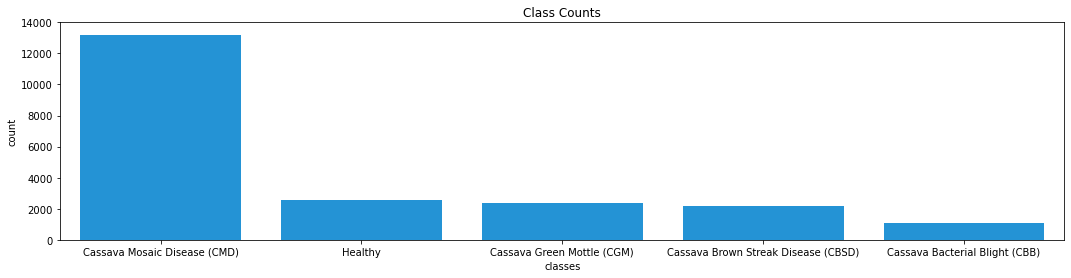

In [6]:
# class counts

f = plt.figure()
f.set_figwidth(18)
f.set_figheight(4)
ax = sns.barplot(x=df.label.value_counts().index, y=df.label.value_counts(), color='xkcd:azure')
ax.set_title('Class Counts')
ax.set_xlabel('classes')
ax.set_ylabel('count')
ax.set_ylim([0, 14000])

0 - Cassava Bacterial Blight (CBB)


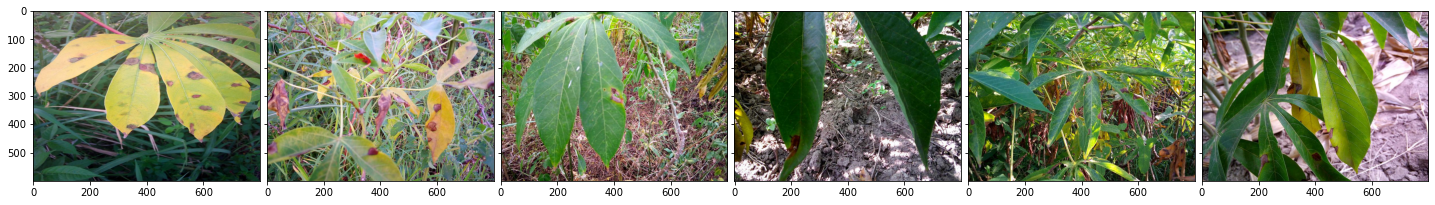

1 - Cassava Brown Streak Disease (CBSD)


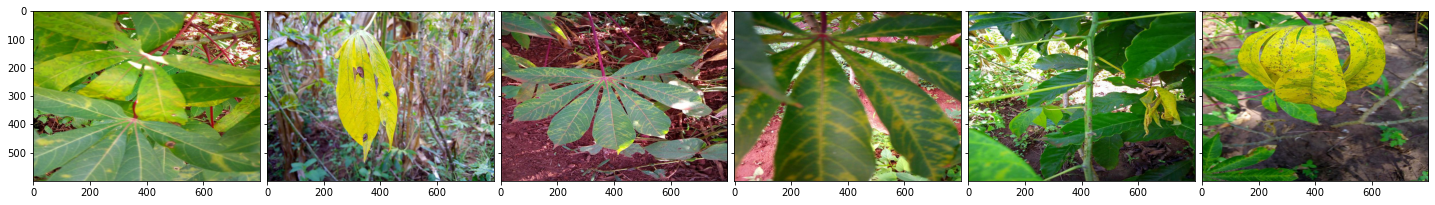

2 - Cassava Green Mottle (CGM)


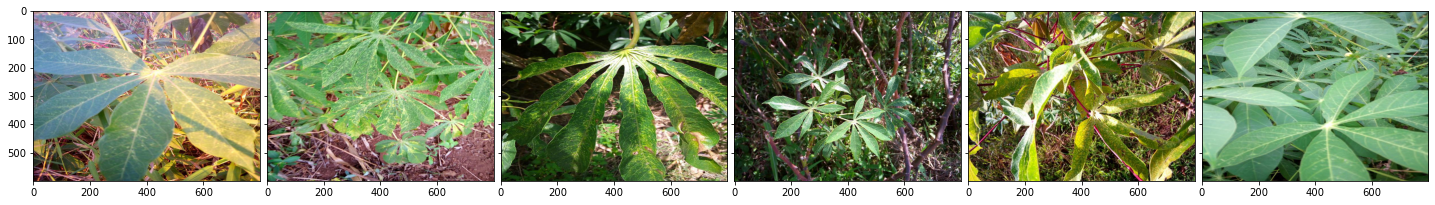

3 - Cassava Mosaic Disease (CMD)


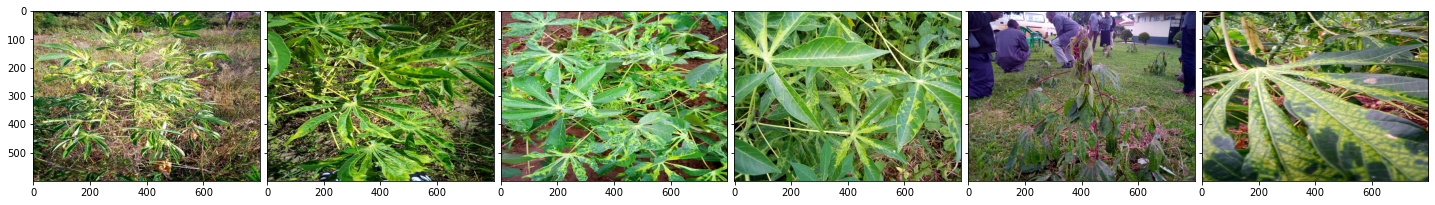

4 - Healthy


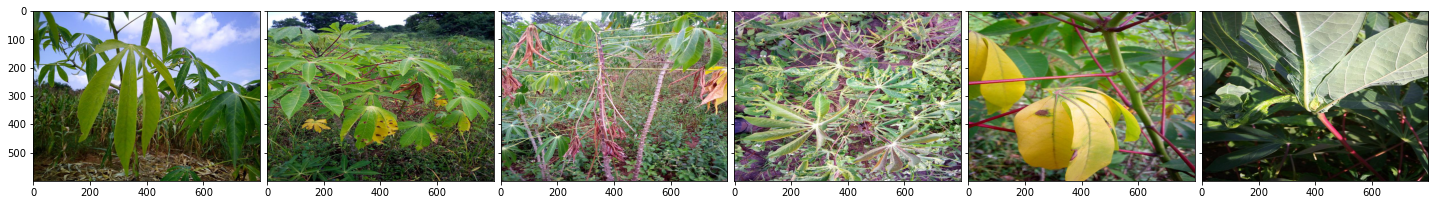

In [7]:
# Let's view some sample images and their human-readable labels.

images_per_class = 6

for label in range(5):
    filenames = os.listdir(Path(f'data/{label}'))[:images_per_class]
    print(f'{label} - {label_to_disease[str(label)]}')
    img_arr = [np.asarray(Image.open(Path(f'data/{label}/{filename}'))) for filename in filenames]
    fig = plt.figure(figsize=(25.0, 10.0))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, images_per_class), axes_pad=0.1)
    for ax, im in zip(grid, img_arr):
        ax.imshow(im)
    plt.show()